In [1]:
pip install py-heat-magic

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext heat

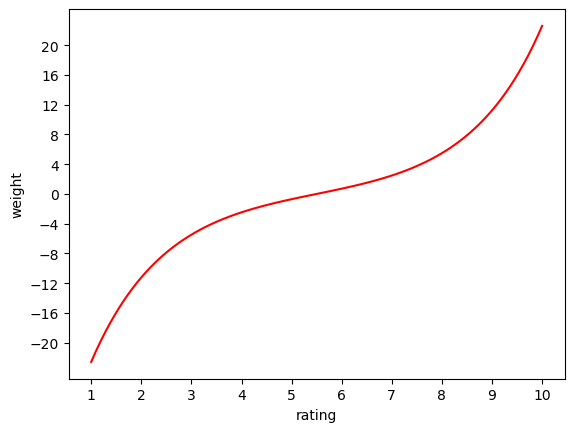

C:\Users\Rafał\FilmRanking\op.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce').astype('Int64')


0.4800669731959373


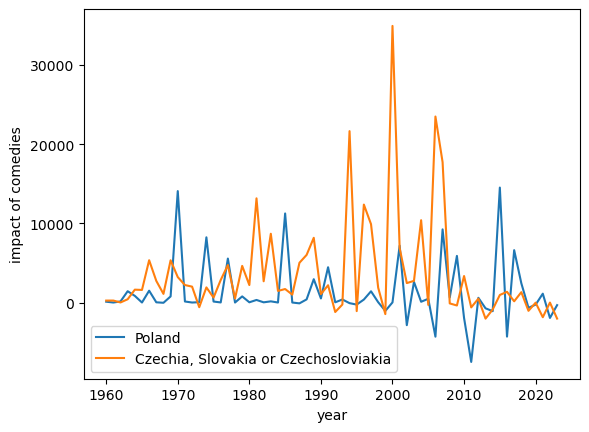

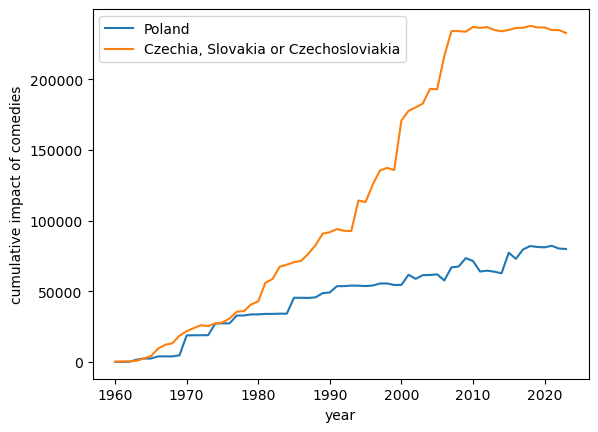

C:\Anaconda\Lib\site-packages\pyheat\pyheat.py:158: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  self.ax.set_yticklabels(row_labels, minor=False)


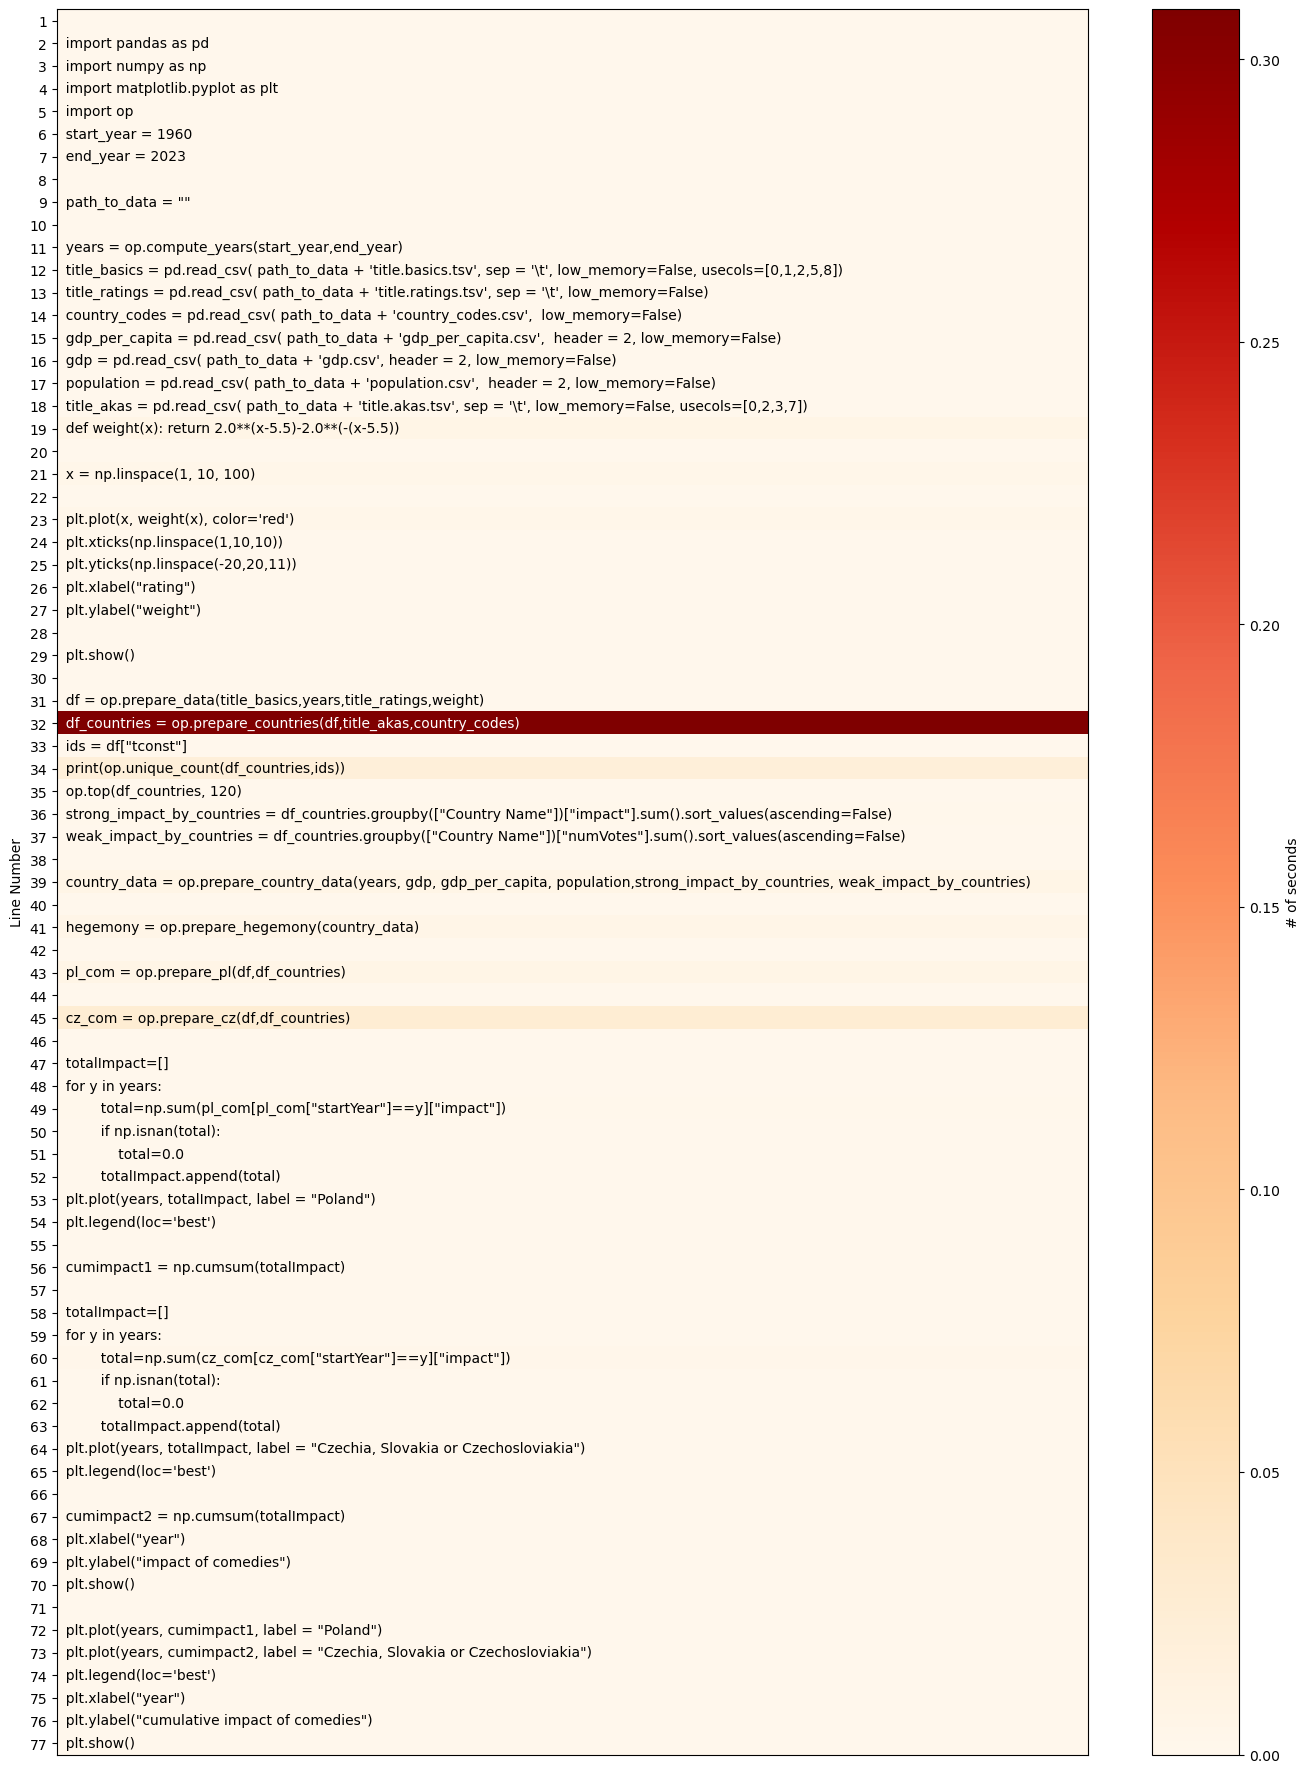

In [3]:
%%heat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import op
start_year = 1960
end_year = 2023

path_to_data = ""

years = op.compute_years(start_year,end_year)
title_basics = pd.read_csv( path_to_data + 'title.basics.tsv', sep = '\t', low_memory=False, usecols=[0,1,2,5,8])
title_ratings = pd.read_csv( path_to_data + 'title.ratings.tsv', sep = '\t', low_memory=False)
country_codes = pd.read_csv( path_to_data + 'country_codes.csv',  low_memory=False)
gdp_per_capita = pd.read_csv( path_to_data + 'gdp_per_capita.csv',  header = 2, low_memory=False)
gdp = pd.read_csv( path_to_data + 'gdp.csv', header = 2, low_memory=False)
population = pd.read_csv( path_to_data + 'population.csv',  header = 2, low_memory=False)
title_akas = pd.read_csv( path_to_data + 'title.akas.tsv', sep = '\t', low_memory=False, usecols=[0,2,3,7])
def weight(x): return 2.0**(x-5.5)-2.0**(-(x-5.5))

x = np.linspace(1, 10, 100)

plt.plot(x, weight(x), color='red')
plt.xticks(np.linspace(1,10,10))
plt.yticks(np.linspace(-20,20,11))
plt.xlabel("rating")
plt.ylabel("weight")

plt.show()

df = op.prepare_data(title_basics,years,title_ratings,weight)
df_countries = op.prepare_countries(df,title_akas,country_codes)
ids = df["tconst"]
print(op.unique_count(df_countries,ids))
op.top(df_countries, 120)
strong_impact_by_countries = df_countries.groupby(["Country Name"])["impact"].sum().sort_values(ascending=False)
weak_impact_by_countries = df_countries.groupby(["Country Name"])["numVotes"].sum().sort_values(ascending=False)

country_data = op.prepare_country_data(years, gdp, gdp_per_capita, population,strong_impact_by_countries, weak_impact_by_countries)

hegemony = op.prepare_hegemony(country_data)

pl_com = op.prepare_pl(df,df_countries)

cz_com = op.prepare_cz(df,df_countries)

totalImpact=[]
for y in years:
        total=np.sum(pl_com[pl_com["startYear"]==y]["impact"])
        if np.isnan(total):
            total=0.0
        totalImpact.append(total) 
plt.plot(years, totalImpact, label = "Poland")
plt.legend(loc='best')

cumimpact1 = np.cumsum(totalImpact)

totalImpact=[]
for y in years:
        total=np.sum(cz_com[cz_com["startYear"]==y]["impact"])
        if np.isnan(total):
            total=0.0
        totalImpact.append(total) 
plt.plot(years, totalImpact, label = "Czechia, Slovakia or Czechosloviakia")
plt.legend(loc='best')

cumimpact2 = np.cumsum(totalImpact)
plt.xlabel("year")
plt.ylabel("impact of comedies")
plt.show()

plt.plot(years, cumimpact1, label = "Poland")
plt.plot(years, cumimpact2, label = "Czechia, Slovakia or Czechosloviakia")
plt.legend(loc='best')
plt.xlabel("year")
plt.ylabel("cumulative impact of comedies")
plt.show()
